In [ ]:
!git clone https://github.com/ahmedramadan96/EALPR.git

Cloning into 'EALPR'...
remote: Enumerating objects: 18740, done.
remote: Counting objects: 100% (12906/12906), done.
remote: Compressing objects: 100% (12903/12903), done.
remote: Total 18740 (delta 12), reused 12892 (delta 3), pack-reused 5834
Receiving objects: 100% (18740/18740), 273.19 MiB | 29.87 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (18735/18735), done.


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from glob import glob
from skimage import io
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
!pip install pydotplus pytesseract

In [ ]:
import pydotplus   #provides a Python Interface to Graphviz's Dot language
from IPython.display import display, Image
import matplotlib.pyplot as plt
import pytesseract
import IPython.display as ipd   #display the python tools "pytesseract"
from requests import get  # to make GET request

In [ ]:
! apt install tesseract-ocr libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (5,606 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 128275 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3

In [ ]:
!git clone https://github.com/tesseract-ocr/tessdata

Cloning into 'tessdata'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 769 (delta 0), reused 1 (delta 0), pack-reused 768
Receiving objects: 100% (769/769), 3.17 GiB | 21.90 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Updating files: 100% (172/172), done.


In [ ]:
import os
os.environ['TESSDATA_PREFIX'] = '/content/tessdata'   #environment variable


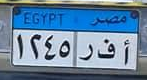

In [ ]:
img = np.array(load_img("/content/EALPR/EALPR- Plates dataset/0025_license_plate_1.png"))
fig = px.imshow(img)
fig.update_layout(width=500, height=600)

In [ ]:
img_cv = cv2.imread("/content/EALPR/EALPR- Plates dataset/0025_license_plate_1.png")
arabic_text=pytesseract.image_to_string(img_cv , lang='eng',config= ".")
print(arabic_text)

In [ ]:
import numpy as np
import cv2

def get_plate_color(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # define range of red color in HSV
    lower_red = np.array([0, 70, 50])
    upper_red = np.array([10, 255, 255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    lower_red = np.array([170, 70, 50])
    upper_red = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv, lower_red, upper_red)

    # combine masks
    mask = mask1 + mask2

    # apply mask to original image
    plate_region = cv2.bitwise_and(image, image, mask=mask)

    # convert to grayscale
    plate_region_gray = cv2.cvtColor(plate_region, cv2.COLOR_BGR2GRAY)

    # apply threshold
    _, thresh = cv2.threshold(plate_region_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # check if plate color is red or black
    if np.mean(thresh) > 127:
        plate_color = 'black'
    else:
        plate_color = 'red'

    return plate_color


In [ ]:
!pip install  webcolors


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


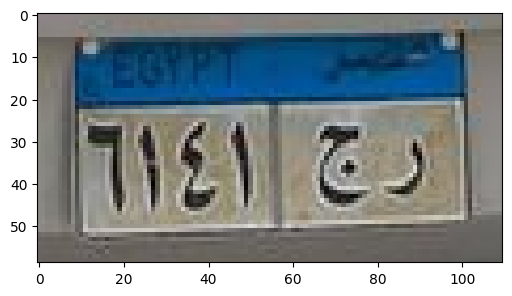

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread('/content/EALPR/EALPR- Plates dataset/1939_license_plate_1.png')
# Display image
plt.figure(dpi=100)
plt.imshow(img)
plt.show()

Top part color: (119.15328282828283, 106.83737373737374, 85.73484848484848)


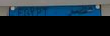

In [ ]:


# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/1939_license_plate_1.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to segment the plate
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours of the plate
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area and select the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)
largest_contour = contours[0]

# Find the bounding box of the largest contour
x,y,w,h = cv2.boundingRect(largest_contour)

# Create a mask for the top part of the plate with the same size as the input image
top_mask = np.zeros_like(img[:,:,0])
top_mask[0:y+h//2, :] = 255

# Apply the mask to the input image
masked_img = cv2.bitwise_and(img, img, mask=top_mask)

# Compute the mean color of the top part of the plate
mean_color = cv2.mean(masked_img, mask=top_mask)[0:3]

# Crop the image to the bounding box of the top part of the plate
cropped_img = img[0:y+h//2, :]

# Create a mask for the top part of the cropped image
crop_mask = np.zeros(cropped_img.shape[:2], dtype=np.uint8)
crop_mask[0:h//2, :] = 255

# Apply the mask to the cropped image
masked_cropped_img = cv2.bitwise_and(cropped_img, cropped_img, mask=crop_mask)

# Display the color information and the cropped image
print(f"Top part color: {mean_color}")
cv2_imshow(masked_cropped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Top part color: (120.69780564263324, 102.48620689655174, 75.17272727272727)


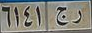

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/1939_license_plate_1.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to segment the plate
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours of the plate
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area and select the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)
largest_contour = contours[0]

# Create a mask for the plate
mask = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.drawContours(mask, [largest_contour], 0, 255, -1)

# Create a mask for the top part of the plate
top_mask = np.zeros_like(img[:,:,0])
top_mask[0:img.shape[0]//2, :] = 255

# Combine the two masks using a bitwise OR operation
combined_mask = cv2.bitwise_or(mask, top_mask)

# Apply the mask to the input image
masked_img = cv2.bitwise_and(img, img, mask=combined_mask)

# Compute the mean color of the top part of the plate
mean_color = cv2.mean(masked_img, mask=top_mask)[0:3]

# Find the bounding box of the largest contour
x,y,w,h = cv2.boundingRect(largest_contour)

# Crop the image to the bounding box of the plate
cropped_img = img[y:y+h, x:x+w]

# Create a mask for the cropped image
crop_mask = np.zeros(cropped_img.shape[:2], dtype=np.uint8)
crop_mask[:, :] = 255

# Apply the mask to the cropped image
masked_cropped_img = cv2.bitwise_and(cropped_img, cropped_img, mask=crop_mask)

# Display the color information and the cropped image
print(f"Top part color: {mean_color}")
cv2_imshow(masked_cropped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


10 20 92 33


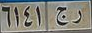

Top part color: (116.94565217391305, 70.32173913043478, 7.9913043478260875)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/1939_license_plate_1.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to segment the plate
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours of the plate
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area and select the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)
largest_contour = contours[0]

# Find the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)
print(x,y,w,h)
# Crop the image to the bounding box of the plate
bottom = img[y:y+h, x:x+w]
plate= img[int(y/2):y,x:x+w]
cv2_imshow(bottom)
cv2_imshow(plate)
# Convert the plate to grayscale
gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

# Apply a threshold to segment the characters of the plate
_, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find the contours of the characters
char_contours, _ = cv2.findContours(thresh_plate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours from left to right
char_contours = sorted(char_contours, key=lambda c: cv2.boundingRect(c)[0])

# Concatenate the characters into a single string
plate_text = ""
for contour in char_contours:
    x, y, w, h = cv2.boundingRect(contour)
    char_img = thresh_plate[y:y+h, x:x+w]
    char_text = pytesseract.image_to_string(char_img, config="--psm 10")
    plate_text += char_text.strip()

# Create a mask for the top part of the plate with the same size as the input image
top_mask = np.zeros_like(plate[:,:,0])
top_mask[0:y+h//2, :] = 255

# Apply the mask to the plate image
masked_plate = cv2.bitwise_and(plate, plate, mask=top_mask)

# Compute the mean color of the top part of the plate
mean_color = cv2.mean(masked_plate, mask=top_mask)[0:3]

# Crop the image to the bounding box of the top part of the plate
cropped_plate = plate[0:y+h//2, :]

# Create a mask for the top part of the cropped image
crop_mask = np.zeros(cropped_plate.shape[:2], dtype=np.uint8)
crop_mask[0:h//2, :] = 255

# Apply the mask to the cropped image
masked_cropped_plate = cv2.bitwise_and(cropped_plate, cropped_plate, mask=crop_mask)

# Display the color information and the cropped images
print(f"Top part color: {mean_color}")
cv2_imshow(masked_cropped_plate)

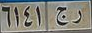

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/1939_license_plate_1.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to segment the plate
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours of the plate
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area and select the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)
largest_contour = contours[0]

# Find the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)
# Crop the image to the bounding box of the plate
plate = img[y:y+h, x:x+w]
top= img[int(y/2):y,x:x+w]
cv2_imshow(plate)
cv2_imshow(top)

(0.0, 0.0, 0.0)


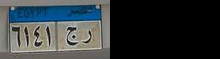

(118.82875605815833, 72.69466882067852, 11.68659127625202)


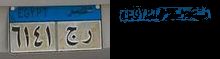

(0.0, 0.0, 0.0)


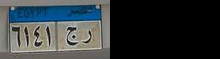

(117.13153961136024, 119.26307922272048, 116.8236173393124)


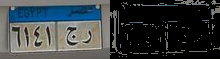

In [ ]:
image = cv2.imread('/content/EALPR/EALPR- Plates dataset/1939_license_plate_1.png')
# define the list of boundaries
boundaries = [
	([17, 15, 100], [50, 56, 200]),  #red
	([86, 31, 4], [220, 88, 50]),   #blue
	([25, 146, 190], [62, 174, 250]), #yellow
	([103, 86, 65], [145, 133, 128])  #gray
]
# loop over the boundaries
for (lower, upper) in boundaries:
  lower = np.array(lower, dtype = "uint8")
  upper = np.array(upper, dtype = "uint8")
  mask = cv2.inRange(image, lower, upper)
  mean_color = cv2.mean(image, mask=mask)[0:3]
  print(mean_color)
  output = cv2.bitwise_and(image, image, mask = mask)
  cv2_imshow( np.hstack([image, output]))


(33.576470588235296, 33.78431372549019, 121.33725490196078)


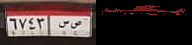

(0.0, 0.0, 0.0)


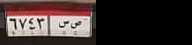

(0.0, 0.0, 0.0)


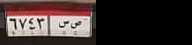

(108.86, 113.84, 121.06)


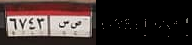

In [ ]:
image = cv2.imread('/content/EALPR/EALPR- Plates dataset/0004_license_plate_1.png')
# define the list of boundaries
boundaries = [
	([17, 15, 100], [50, 56, 200]),  #red
	([86, 31, 4], [220, 88, 50]),   #blue
	([25, 146, 190], [62, 174, 250]), #yellow
	([103, 86, 65], [145, 133, 128])  #gray
]
# loop over the boundaries
for (lower, upper) in boundaries:
  lower = np.array(lower, dtype = "uint8")
  upper = np.array(upper, dtype = "uint8")
  mask = cv2.inRange(image, lower, upper)
  mean_color = cv2.mean(image, mask=mask)[0:3]
  print(mean_color)
  output = cv2.bitwise_and(image, image, mask = mask)
  cv2_imshow( np.hstack([image, output]))


(0.0, 0.0, 0.0)


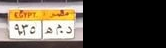

(0.0, 0.0, 0.0)


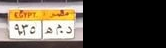

(43.92424242424242, 161.65151515151516, 230.06060606060606)


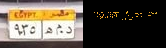

(115.08108108108108, 109.25675675675676, 119.24324324324326)


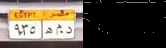

In [ ]:
image = cv2.imread('/content/EALPR/EALPR- Plates dataset/0008_license_plate_1.png')
# define the list of boundaries
boundaries = [
	([17, 15, 100], [50, 56, 200]),  #red
	([86, 31, 4], [220, 88, 50]),   #blue
	([25, 146, 190], [62, 174, 250]), #yellow
	([103, 86, 65], [145, 133, 128])  #gray
]
# loop over the boundaries
for (lower, upper) in boundaries:
  lower = np.array(lower, dtype = "uint8")
  upper = np.array(upper, dtype = "uint8")
  mask = cv2.inRange(image, lower, upper)
  mean_color = cv2.mean(image, mask=mask)[0:3]
  print(mean_color)
  output = cv2.bitwise_and(image, image, mask = mask)
  cv2_imshow( np.hstack([image, output]))


red (0.0, 0.0, 0.0)
blue (104.55208333333333, 80.83333333333333, 21.552083333333332)
yellow (0.0, 0.0, 0.0)
gray (115.0, 122.39873417721519, 99.27848101265823)


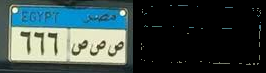

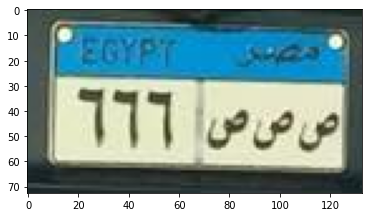

In [ ]:
image = cv2.imread('/content/EALPR/EALPR- Plates dataset/0109_license_plate_1.png')
# define the list of boundaries
boundaries =  {

  'red':	([17, 15, 100], [50, 56, 200]),  #red
	'blue':([86, 31, 4], [220, 88, 50]),   #blue
'yellow':	([25, 146, 190], [62, 174, 250]), #yellow
'gray':	([103, 86, 65], [145, 133, 128])  #gray
    }

# loop over the boundaries
for color,(lower, upper) in boundaries.items():
  lower = np.array(lower, dtype = "uint8")
  upper = np.array(upper, dtype = "uint8")
  mask = cv2.inRange(image, lower, upper)
  mean_color = cv2.mean(image, mask=mask)[0:3]

  print(color,mean_color)
  output = cv2.bitwise_and(image, image, mask = mask)
cv2_imshow( np.hstack([image, output]))
# convert the BGR image to RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)